In [6]:
import numpy as np
import vampyr3d as vp

from numpy import pi

from math import isclose

min_scale = 0
max_depth = 25
order = 5
prec = 1e-3

corner = [0, 0, 0]
box = 1
boxes = [box, box, box]

mid = .5

world = vp.BoundingBox(min_scale, corner, boxes)
basis = vp.InterpolatingBasis(order)
MRA = vp.MultiResolutionAnalysis(world, basis, max_depth)



def phi_exact(x):
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)

    return alpha*np.exp(-beta*((x[0] - mid)**2 + (x[1] - mid)**2 + (x[2] - mid)**2))


def d_phi_exact(x):
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)

    return -2.0*beta*alpha*x[0]*np.exp(-beta*(x[0]**2 + x[1]**2 + x[2]**2))


def v_helm(x):
    mu = 10.0
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)
    coef = -6.0*beta + 4*beta**2*(x[0] - mid)**2 +\
        4*beta**2*(x[1]-mid)**2 + 4*beta**2*(x[2]-mid)**2 - mu**2

    return (-1/(4.0*np.pi))*alpha*coef*np.exp(-beta*((x[0]-mid)**2 +
                                              (x[1]-mid)**2 + (x[2]-mid)**2))


def v_pois(x):
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)
    coef = -6.0*beta + 4*beta**2*(x[0]-.5)**2 +\
        4*beta**2*(x[1]-.5)**2 + 4*beta**2*(x[2]-.5)**2

    return (-1/(4.0*np.pi))*alpha*coef*np.exp(-beta*((x[0]-.5)**2 +
                                              (x[1]-.5)**2 + (x[2]-.5)**2))

H = vp.HelmholtzOperator(MRA, 10.0, prec)
P = vp.PoissonOperator(MRA, prec)



In [7]:
MRA.getWorldBox().getBoxLength(2)

1.0

In [8]:
phi_tree = vp.FunctionTree(MRA)
phi_tree_pois = vp.FunctionTree(MRA)
v_tree = vp.FunctionTree(MRA)
v_tree_pois = vp.FunctionTree(MRA)

In [9]:
vp.project(prec, v_tree, v_helm)
vp.project(prec, v_tree_pois, v_pois)

vp.apply(prec, phi_tree, H, v_tree)
vp.apply(prec, phi_tree_pois, P, v_tree_pois)

In [10]:
import matplotlib.pyplot as plt

x = np.arange(0, MRA.getWorldBox().getBoxLength(2), .01)

def give_y(x):
    y = np.empty(x.size, dtype=float)
    for i in range(x.size):
        tmp = x[i]
        y[i] = phi_tree.evalf([tmp, mid, mid])
    return y


def give_y_exact(x):
    y = np.empty(x.size, dtype=float)
    for i in range(x.size):
        tmp = x[i]
        y[i] = phi_exact([tmp, mid, mid])
    return y

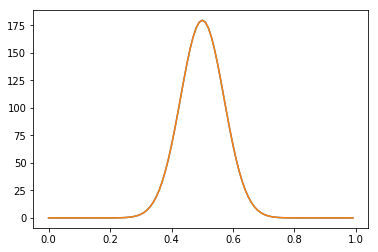

In [11]:
y = give_y(x)
y_exact = give_y_exact(x)

plt.plot(x, y_exact, x, y)
plt.show()

In [12]:
phi_tree.integrate()

0.9991483131453045